In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tqdm import tqdm

## Прыжковая диффузия

Text(0.5, 1.0, 'Траектория частицы')

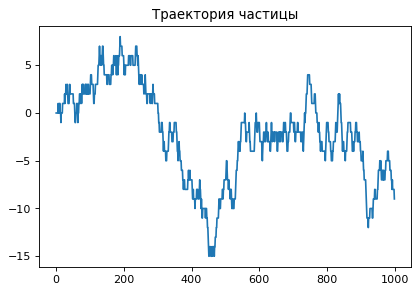

In [5]:
N_steps = 1000
l = 0.2
m = 0.2

x = np.zeros(N_steps)

for i in range(1, N_steps):
    w = np.random.uniform(0,1)
    if w < l:
        x[i] = x[i-1] + 1
    elif l < w < m + l:
        x[i] = x[i-1] - 1
    else:
        x[i] = x[i-1]
        

figure(figsize=(6, 4), dpi=80)        
plt.plot(x)
plt.title("Траектория частицы")

In [6]:
mrange = 1000
N_dots = 1000
N_steps = 1000
grid = np.zeros((N_steps, mrange))
l = 0.5
m = 0.3


for j in tqdm(range(N_dots)):
    x = np.zeros(N_steps)
    grid[0][mrange // 2] += 1
    for i in range(1, N_steps):
        w = np.random.uniform(0,1)
        if w < l:
            x[i] = x[i-1] + 1
        elif l < w < m + l:
            x[i] = x[i-1] - 1
        else:
            x[i] = x[i-1]
        grid[i][int(x[i])+mrange//2] += 1

100%|██████████| 1000/1000 [00:03<00:00, 278.60it/s]


In [7]:
def prob(n,t,lbd,mu):
    a = mu - lbd
    D = (mu + lbd) / 2
    return np.exp(-(n + a*t) ** 2 / (4 * D * t)) / np.sqrt(4 * np.pi * D * t)

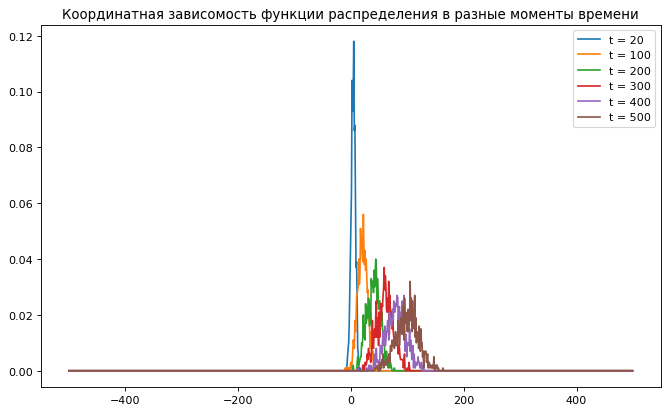

In [8]:
figure(figsize=(10, 6), dpi=80)
# plt.plot(np.arange(-mrange // 2,mrange // 2),grid[0]/N_dots)
plt.plot(np.arange(-mrange // 2,mrange // 2),grid[20]/N_dots,label="t = 20")
plt.plot(np.arange(-mrange // 2,mrange // 2),grid[100]/N_dots,label="t = 100")
plt.plot(np.arange(-mrange // 2,mrange // 2),grid[200]/N_dots,label="t = 200")
plt.plot(np.arange(-mrange // 2,mrange // 2),grid[300]/N_dots,label="t = 300")
plt.plot(np.arange(-mrange // 2,mrange // 2),grid[400]/N_dots,label="t = 400")
plt.plot(np.arange(-mrange // 2,mrange // 2),grid[500]/N_dots,label="t = 500")

plt.title("Координатная зависомость функции распределения в разные моменты времени")
plt.legend()

Text(0.5, 1.0, 'Координатная зависомость функции распределения при t=500')

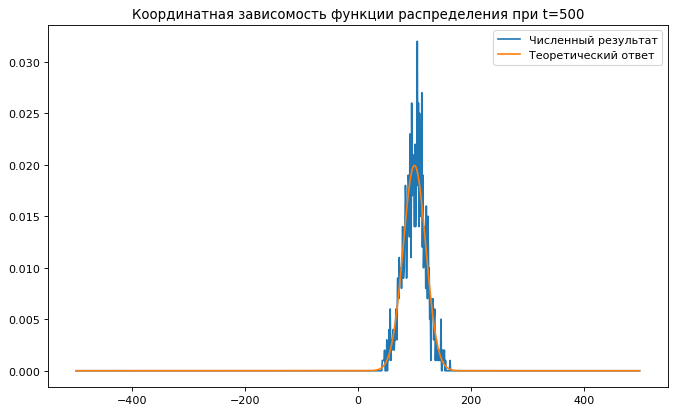

In [9]:
figure(figsize=(10, 6), dpi=80)

plt.plot(np.arange(-mrange // 2,mrange // 2), grid[500]/N_dots, label="Численный результат")
plt.plot(np.arange(-mrange // 2,mrange // 2), prob(np.arange(-mrange // 2,mrange // 2),500,l,m), label="Теоретический ответ")

plt.legend()
plt.title("Координатная зависомость функции распределения при t=500")

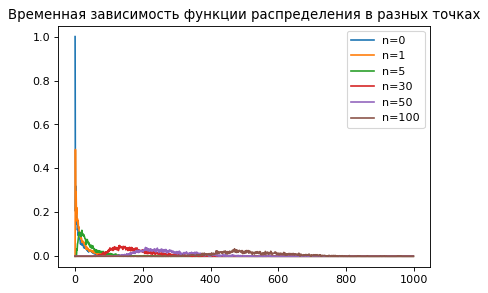

In [10]:
figure(figsize=(6, 4), dpi=80)

plt.plot(grid.T[mrange//2]/N_dots,label="n=0")
plt.plot(grid.T[mrange//2 + 1]/N_dots,label="n=1")
plt.plot(grid.T[mrange//2 + 5]/N_dots,label="n=5")
plt.plot(grid.T[mrange//2 + 30]/N_dots,label="n=30")
plt.plot(grid.T[mrange//2 + 50]/N_dots,label="n=50")
plt.plot(grid.T[mrange//2 + 100]/N_dots,label="n=100")

plt.title("Временная зависимость функции распределения в разных точках")
plt.legend()